# Named Entity Reconition with ELMo


Dataset : 
- https://github.com/nxs5899/Named-Entity-Recognition_DeepLearning-keras/blob/master/Named_Entity_Recognition_ELMo.ipynb

References :
- https://github.com/nxs5899/Named-Entity-Recognition_DeepLearning-keras/blob/master/Named_Entity_Recognition_ELMo.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./dataset/ner_dataset.csv', encoding='latin1')
data = data.drop(['POS'], axis=1)
data = data.fillna(method='ffill')
data.tail(10)

,Sentence #,Word,Tag
1048565,Sentence: 47958,impact,O
1048566,Sentence: 47958,.,O
1048567,Sentence: 47959,Indian,B-gpe
1048568,Sentence: 47959,forces,O
1048569,Sentence: 47959,said,O
1048570,Sentence: 47959,they,O
1048571,Sentence: 47959,responded,O
1048572,Sentence: 47959,to,O
1048573,Sentence: 47959,the,O
1048574,Sentence: 47959,attack,O


In [3]:
words = set(data.Word.unique())
words.add('PADword')
n_words = len(words)
n_words

35179

In [4]:
tags = set(data.Tag.unique())
n_tags = len(tags)
n_tags

17

In [5]:
# for ind, grp in data.groupby('Sentence #'):
#     for w, t in zip(grp['Word'].values.tolist(), grp['Tag'].values.tolist()):
#         print(w)
#         print(t)

In [8]:
class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s:[(w, t) for w, t in zip(s["Word"].values.tolist(), s['Tag'].values.tolist())]
        self.grouped = self.data.groupby('Sentence #').apply(agg_func)
        self.sentences = [s for s in self.grouped]
        
    def get_next(self):
        try:
            s = self.grouped['Sentence: {}'.format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [10]:
getter = SentenceGetter(data)
sent = getter.get_next()
print(sent)

[('Thousands', 'O'), ('of', 'O'), ('demonstrators', 'O'), ('have', 'O'), ('marched', 'O'), ('through', 'O'), ('London', 'B-geo'), ('to', 'O'), ('protest', 'O'), ('the', 'O'), ('war', 'O'), ('in', 'O'), ('Iraq', 'B-geo'), ('and', 'O'), ('demand', 'O'), ('the', 'O'), ('withdrawal', 'O'), ('of', 'O'), ('British', 'B-gpe'), ('troops', 'O'), ('from', 'O'), ('that', 'O'), ('country', 'O'), ('.', 'O')]


In [11]:
sentences = getter.sentences
len(sentences)

47959

In [12]:
largest_sen = max(len(sen) for sen in sentences)
largest_sen

104

(array([1.300e+01, 1.800e+02, 7.030e+02, 1.363e+03, 2.152e+03, 2.803e+03,
        3.496e+03, 3.965e+03, 4.559e+03, 4.849e+03, 4.706e+03, 4.447e+03,
        3.814e+03, 3.117e+03, 2.433e+03, 1.699e+03, 1.767e+03, 6.490e+02,
        4.720e+02, 2.660e+02, 1.710e+02, 1.050e+02, 7.300e+01, 5.900e+01,
        2.400e+01, 1.800e+01, 2.100e+01, 6.000e+00, 9.000e+00, 6.000e+00,
        2.000e+00, 4.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  1.  ,   3.06,   5.12,   7.18,   9.24,  11.3 ,  13.36,  15.42,
         17.48,  19.54,  21.6 ,  23.66,  25.72,  27.78,  29.84,  31.9 ,
         33.96,  36.02,  38.08,  40.14,  42.2 ,  44.26,  46.32,  48.38,
         50.44,  52.5 ,  54.56,  56.62,  58.68,  60.74,  62.8 ,  64.86,
         66.92,  68.98,  71.04,  73.1 ,  75.16,  77.22,  79.28,  81.34,
         83.4 , 

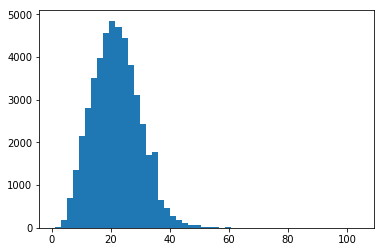

In [13]:
plt.hist([len(sen) for sen in sentences], bins=50)

In [14]:
words2index = {w:i for i,w in enumerate(words)}
tags2index = {t:i for i,t in enumerate(tags)}

In [15]:
words2index['Want']

12571

In [16]:
tags2index['B-eve']

16

In [18]:
# for padding

max_len = 50
X = [[w[0] for w in s] for s in sentences]

# X = pad_sequences(maxlen=max_len, \
#                   sequences=X,\
#                  padding='post',\
#                  value='PADword')

new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    new_X.append(new_seq)
new_X[15]

['Israeli',
 'officials',
 'say',
 'Prime',
 'Minister',
 'Ariel',
 'Sharon',
 'will',
 'undergo',
 'a',
 'medical',
 'procedure',
 'Thursday',
 'to',
 'close',
 'a',
 'tiny',
 'hole',
 'in',
 'his',
 'heart',
 'discovered',
 'during',
 'treatment',
 'for',
 'a',
 'minor',
 'stroke',
 'suffered',
 'last',
 'month',
 '.',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword']

In [19]:
from keras.preprocessing.sequence import pad_sequences
y = [[tags2index[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, \
                  sequences=y,\
                 padding='post',\
                 value=tags2index['O'])
y[15]

/Users/grace/workspace/keras/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/grace/workspace/keras/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


array([ 1,  7,  7,  2, 11, 11, 11,  7,  7,  7,  7,  7,  8,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7],
      dtype=int32)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_X, \
                                                    y, \
                                                    test_size=0.1, \
                                                    random_state=2018)

In [21]:
batch_size = 32

import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K

sess = tf.Session()
K.set_session(sess)

In [22]:
elmo_model = hub.Module('https://tfhub.dev/google/elmo/2', trainable=True)

INFO:tensorflow:Using /var/folders/gb/y7rkqw7s7_z517__ps2kqgxr0000gn/T/tfhub_modules to cache modules.


In [23]:
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [24]:
def elmo_embedding(x):
    return elmo_model(inputs={
                        'tokens' : tf.squeeze(tf.cast(x, tf.string)),
                        'sequence_len' : tf.constant(batch_size*[max_len])
                    },\
                    signature= 'tokens',\
                    as_dict=True)['elmo']

In [25]:
from keras.models import Model, Input
from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda

In [26]:
input_text = Input(shape=(max_len, ), dtype=tf.string)
embedding = Lambda(elmo_embedding,\
                  output_shape=(max_len, 1024))(input_text)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [27]:
x = Bidirectional(LSTM(units=512, return_sequences=True,\
                 recurrent_dropout=0.2, dropout=0.2))(embedding)

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [28]:
x_rnn = Bidirectional(LSTM(units=512, return_sequences=True,\
                          recurrent_dropout=0.2, dropout=0.2))(x)

In [29]:
x = add([x, x_rnn])

In [30]:
out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)

In [31]:
model = Model(input_text, out)
model.compile(optimizer='adam',\
             loss='sparse_categorical_crossentropy',\
             metrics=['accuracy'])

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [32]:
X_train, X_value = X_train[:1213*batch_size], X_train[-135*batch_size:]
y_train, y_value = y_train[:1213*batch_size], y_train[-135*batch_size:]
y_train = y_train.reshape(y_train.shape[0], y_train.shape[1], 1)
y_value = y_value.reshape(y_value.shape[0], y_value.shape[1], 1)

In [ ]:
len(X_train)

38816

In [ ]:
history = model.fit(np.array(X_train), y_train,\
                    validation_data=(np.array(X_value), y_value),\
                    batch_size=batch_size, epochs=3, verbose=1)

Train on 38816 samples, validate on 4320 samples
Epoch 1/3
31488/38816 [=======================>......] - ETA: 10056s - loss: 0.0661 - acc: 0.9811

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
X_te = X_te[:149*batch_size]
test_pred = model.predict(np.array(X_te), verbose=1)

In [ ]:
idx2tag = {i: w for w, i in tags2index.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PADword", "O"))
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PADword", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = test2label(y_te[:149*32])

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

In [ ]:
print(classification_report(test_labels, pred_labels))

In [ ]:
i = 390
p = model.predict(np.array(X_te[i:i+batch_size]))[0]
p = np.argmax(p, axis=-1)
print("{:15} {:5}: ({})".format("Word", "Pred", "True"))
print("="*30)
for w, true, pred in zip(X_te[i], y_te[i], p):
    if w != "PADword":
        print("{:15}:{:5} ({})".format(w, tags[pred], tags[true]))